In [2]:
# first we import required libraries
import os # to load files from the system
import time
import matplotlib.pyplot as plt # for plotting
from skimage import io, color, filters, feature # Importing the canny function from the feature module


# we define edge_detection using Sobel and Canny
def edge_detection(image_path):
    # Read the image from the file path
    image = io.imread(image_path)

    # Convert to grayscale for edge detection
    gray_image = color.rgb2gray(image)  

    # Sobel edge detection with timing
    start_sobel = time.time()
    sobel_edges = filters.sobel(gray_image)
    end_sobel = time.time()
    sobel_time = end_sobel - start_sobel

    # Canny edge detection with timing
    start_canny = time.time()
    canny_edges = feature.canny(gray_image)
    end_canny = time.time()
    canny_time = end_canny - start_canny

    return sobel_edges, sobel_time, canny_edges, canny_time

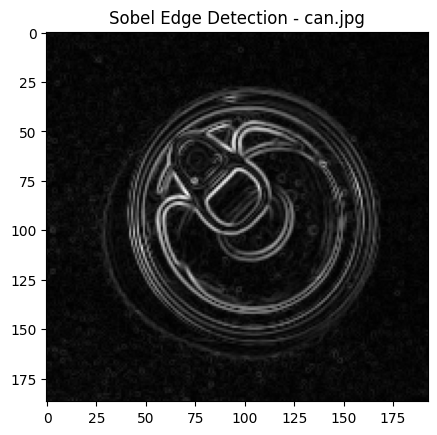

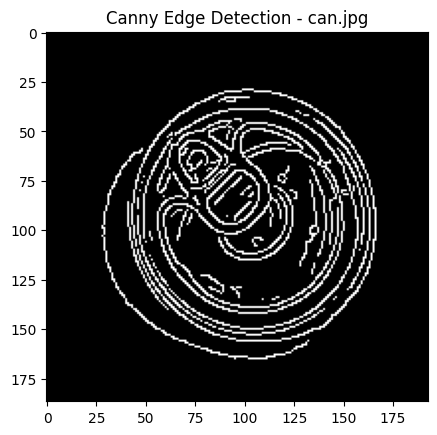

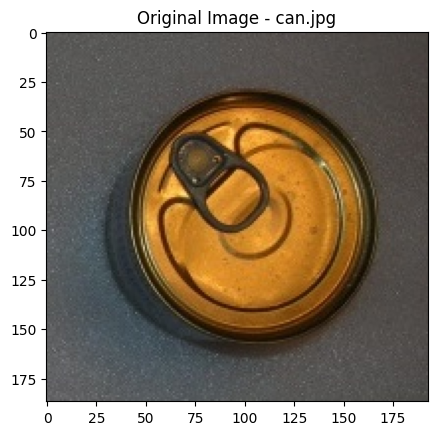

For can.jpg:
Sobel Edge Detection - Time taken: 1.044754 seconds
Canny Edge Detection - Time taken: 0.048996 seconds


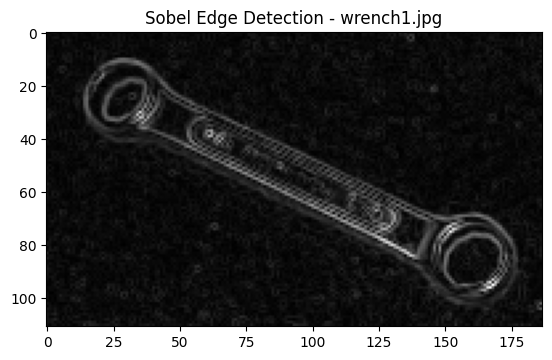

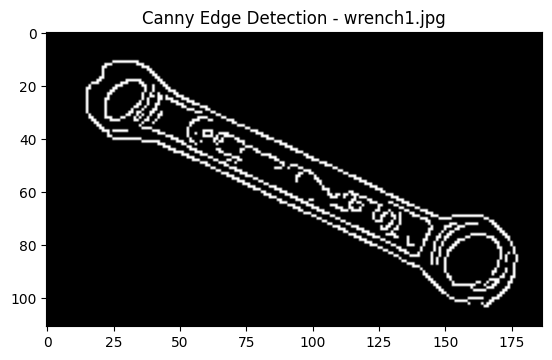

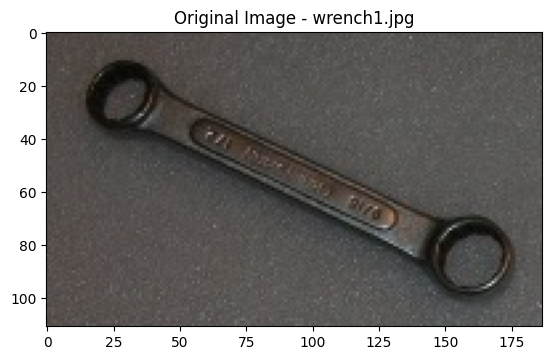

For wrench1.jpg:
Sobel Edge Detection - Time taken: 0.000999 seconds
Canny Edge Detection - Time taken: 0.003004 seconds


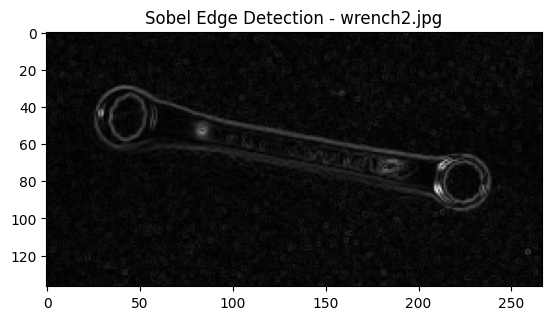

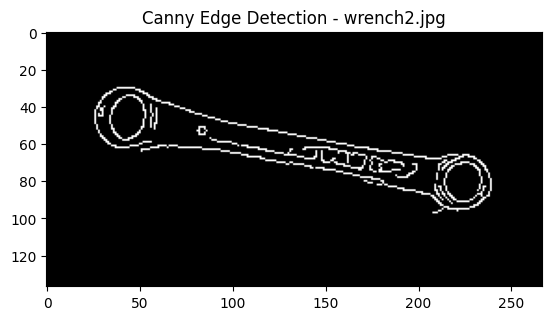

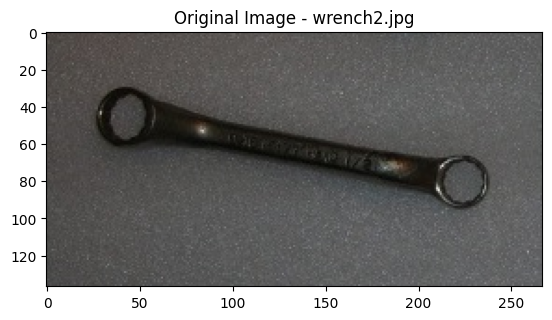

For wrench2.jpg:
Sobel Edge Detection - Time taken: 0.003003 seconds
Canny Edge Detection - Time taken: 0.004998 seconds


In [3]:

# Get the current directory
# we need to fetch the current working directory in order to access the image files
current_directory = os.getcwd()  

# Image filenames
image_files = ['can.jpg', 'wrench1.jpg', 'wrench2.jpg']


# We define a for loop to process and save results for each image
for filename in image_files:
    image_path = os.path.join(current_directory, filename)
    if os.path.exists(image_path):
        sobel_edges, sobel_time, canny_edges, canny_time = edge_detection(image_path)

        # Save and display Sobel edges
        plt.imshow(sobel_edges, cmap='gray')
        plt.title(f'Sobel Edge Detection - {filename}')
        plt.savefig(f'sobel_{filename}')
        plt.show()

        # Save and display Canny edges
        plt.imshow(canny_edges, cmap='gray')
        plt.title(f'Canny Edge Detection - {filename}')
        plt.savefig(f'canny_{filename}')
        plt.show()

        # Display the original image for comparison
        plt.imshow(io.imread(image_path))
        plt.title(f'Original Image - {filename}')
        plt.show()

        # Display speed and accuracy results
        print(f"For {filename}:")
        print(f"Sobel Edge Detection - Time taken: {sobel_time:.6f} seconds")
        print(f"Canny Edge Detection - Time taken: {canny_time:.6f} seconds")
    else:
        # if the image files are not found in the current working directory
        print(f"File '{filename}' not found in directory: {current_directory}")